mle
4149.7943904
mle
1583.97446836
mle
1577.49669373
mle
1565.11886165
mle
1577.8427421
mle
1557.01758291
mle
1590.88705903
mle
1594.7764433
mle
1575.88002176
[4149.7943904015356, 1583.9744683574741, 1577.4966937319346, 1565.118861647268, 1577.8427420999221, 1557.0175829127952, 1590.8870590308995, 1594.7764433045577, 1575.8800217576072]
[4161.7773194957517, 1613.931791093014, 1625.4284101087985, 1631.0249716654557, 1661.7232457594339, 1658.872480213631, 1710.7163499730591, 1732.5801278880413, 1731.6580999824148]
[-2565.8199220440615, -6.4777746255394959, -12.377832084666579, 12.723880452654157, -20.825159187126928, 33.86947611810433, 3.8893842736581519]
False


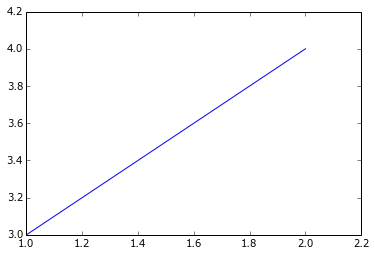

In [4]:
# %load ron_gmmtest.py
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import mixture


#woah sci kit learn is really cool

np.random.seed(1)

mleArr = []
bic = []
mleDifferences = []


def mle(GMM, X):
	return -2 * GMM.score(X).sum()

def verifyConcavity(arr):
	for x in xrange(0, len(arr) - 2):
		if arr[x+2] - 2*arr[x +1] + arr[x] >  0:
			return False
	return True
			

for x in xrange(1,10):
	g = mixture.GMM(n_components=x)
	# generate random observations with two modes centered on 0 and 100 
	obs = np.concatenate((np.random.randn(100, 1), 100 + np.random.randn(300, 1)))
	g.fit(obs)
	print 'mle'
	print mle(g, obs)
	mleArr.append(mle(g, obs))
	bic.append(g.bic(obs))

print mleArr
#why is the fit so good for 1 GMM?
print bic

for x in xrange(1,len(mleArr) - 1):
	mleDifferences.append(mleArr[x] - mleArr[x-1])	

print mleDifferences
print verifyConcavity(mleDifferences)

plt.plot([1,2], [3,4])



#bic source code, using this to define MLE function
# def bic(self, X):
# """Bayesian information criterion for the current model fit
# and the proposed data
# Parameters
# ----------
# X : array of shape(n_samples, n_dimensions)
# Returns
# -------
# bic: float (the lower the better)
# """
# return (-2 * self.score(X).sum() +
#         self._n_parameters() * np.log(X.shape[0]))




